In [1]:
# Loading all the needed Packages
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB

# Import classes from Class.py
from Data_handling import *
from Class import *
from Class_no_zone import *

In [2]:
## DATA INDEX

Data_df

,Name,Size,Content
0,Dem,"(3600, 17)",Demand for each load for each hour of the inve...
1,Uti,"(17, 1)",Utility for each load for one hour
2,Load_Z,"(2, 17)",Zone of each load
3,Gen_E_OpCost,"(16, 1)",Operationnal cost of each existing generator
4,Gen_N_OpCost,"(16, 1)",Operationnal cost of each new generator
5,Gen_E_Cap,"(16, 1)",Maximum capacity for existing units
6,Gen_N_MaxInvCap,"(16, 1)",Maximum capacity investment of each new generator
7,Gen_N_InvCost,"(16, 1)",Unit Investment cost of each new generator
8,Gen_E_Tech,"(16, 1)",Technology of each existing generator
9,Gen_N_Tech,"(16, 1)",Technology of each new generator


In [3]:
## PARAMETERS DEFINITION

# Time
H = 24          # Hours in a day
D = 5           # Typical days in a year
Y = 30          # Years of the investment timeline
N = H*D*Y       # Number of hours in the investment timeline    


# Number of loads and generators
N_dem = len(Dem[0,:])       # Number of loads
N_gen_E = len(Gen_E_OpCost)   # Number of existing generators
N_gen_N = len(Gen_N_OpCost)   # Number of new generators
N_zone = len(Trans_Z_Connected_To_Z)     # Number of zones
N_line = len(Trans_Line_From_Z)   # Number of transmission lines


# Hyperparameters
B = 1000000000   # Budget for the investment problem
R = 73 # Conversion rate


In [4]:
## CREATE THE PARAMETERS AND DATA OBJECTS
ParametersObj = Parameters(H, D, Y, N, N_dem, N_gen_E, N_gen_N, N_zone, N_line, B, R, N_S, N_S_test, max_deviation)
DataObj = InputData(Dem, Uti, Load_Z, Gen_E_OpCost, Gen_N_OpCost, Gen_N_MaxInvCap, Gen_E_Cap, Gen_N_InvCost, Gen_E_Tech, Gen_N_Tech, Gen_E_Z, Gen_N_Z, Gen_E_OpCap, Gen_N_OpCap, Trans_React, Trans_Cap, Trans_Line_From_Z, Trans_Line_To_Z, Trans_Z_Connected_To_Z,Gen_N_Data_scenarios,Gen_N_OpCost_scenarios)

# Model 1: Sequential optimization of Dispatch problem and Investment problem

### 1) Market Clearing

In [5]:
# Run the Market Clearing Problem
MarketClearing1 = MarketClearingModel1(ParametersObj, DataObj)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-24


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 140400 rows, 126000 columns and 270000 nonzeros
Model fingerprint: 0x4c1471a4
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [3e+01, 1e+03]
  Bounds range     [1e+03, 1e+03]
  RHS range        [4e-01, 1e+03]
Presolve removed 134239 rows and 109069 columns
Presolve time: 1.01s
Presolved: 6161 rows, 16931 columns, 19670 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.739e+03
 Factor NZ  : 8.900e+03 (roughly 10 MB of memory)
 Factor Ops : 1.438e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0 

### 2) Investment Problem

In [7]:
# Run the investmentmodel
InvestmentPB1 = InvestmentModel1(ParametersObj, DataObj, MarketClearing1.res.DA_price)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 57857 rows, 57616 columns and 111932 nonzeros
Model fingerprint: 0xbaa5e9fc
Coefficient statistics:
  Matrix range     [4e-04, 1e+06]
  Objective range  [1e+03, 1e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+09]
Presolve removed 57856 rows and 57610 columns
Presolve time: 0.29s
Presolved: 1 rows, 6 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2734490e+10   3.072000e+05   0.000000e+00      0s
       1    2.1889150e+10   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.45 seconds (0.06 work units)
Optimal objective  2.188915000e+10
Objective value:  21889150000.0


In [8]:
InvestmentPB1.res.df

,Technology,Invested capacity (MW)
0,Coal,0.0
1,Coal,0.0
2,Coal,0.0
3,Gas,0.0
4,Coal,0.0
5,Wind,400.0
6,Wind,200.0
7,PV,0.0
8,Gas,0.0
9,Coal,0.0


### 3) Stochastic robust investment problem

In [9]:
  
# Class for the robust stochastic model
class InvestmentModel_Robust1():
    def __init__(self, Parameters, Data, DA_Price, Model_results = 1, Guroby_results = 1):
        self.D = Data  # Data
        self.P = Parameters  # Parameters
        self.DA_Price = DA_Price  # Day-ahead price
        self.Model_results = Model_results  # Display results
        self.Guroby_results = Guroby_results  # Display guroby results
        self.var = Expando()  # Variables
        self.con = Expando()  # Constraints
        self.res = Expando()  # Results
        self._build_model() 


    def _build_variables(self):
        self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
        self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N,self.P.N_S), lb=0) # Power output per hour for every new generator


    def _build_constraints(self):
        # Capacity investment constraint
        self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

        # Max production constraint
        for s in range(self.P.N_S):
            self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

        # Budget constraint
        for s in range(self.P.N_S):
            self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] <= self.P.B, name='Budget constraint')


    def _build_objective(self):
        revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
        op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
        invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
        objective = (1/self.P.N_S) * self.P.R*(revenues - op_costs) - invest_costs
        self.m.setObjective(objective, GRB.MAXIMIZE)


    def _display_guropby_results(self):
        self.m.setParam('OutputFlag', self.Guroby_results)
    

    def _build_model(self):
        self.m = gp.Model('Investment problem')
        self._build_variables()  
        self._build_constraints()
        self._build_objective()
        #self._display_guropby_results()
        self.m.optimize()
        if self.Model_results == 1:
            self._extract_results()

    def _extract_results(self):
        # Display the objective value
        print('Objective value: ', self.m.objVal)
        
        # Display the generators the model invested in, in a dataframe
        self.res.P_N = self.var.P_N.X
        self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
        self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
        self.res.df['Invested capacity (MW)'] = self.res.P_N      

In [29]:
#Run the stochastic investment model (without scenario dependent variables)
Investment_Robust = InvestmentModel_Robust1(ParametersObj, DataObj, MarketClearing1.res.DA_price)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 173059 rows, 172816 columns and 335284 nonzeros
Model fingerprint: 0x8270a605
Coefficient statistics:
  Matrix range     [4e-04, 1e+06]
  Objective range  [4e+00, 3e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+09]
Presolve removed 173056 rows and 172801 columns
Presolve time: 0.54s
Presolved: 3 rows, 15 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3243714e+10   9.635274e+05   0.000000e+00      1s
       4    2.3804173e+10   0.000000e+00   0.000000e+00      1s

Solved in 4 iterations and 0.79 seconds (0.17 work units)
Optimal objective  2.380417345e+10
Objective value:  23804173447.79445


In [11]:
1.146243500e+10

11462435000.0

In [12]:
Investment_Robust.res.df

,Technology,Invested capacity (MW)
0,Coal,0.000000
1,Coal,0.000000
2,Coal,0.000000
3,Gas,0.000000
4,Coal,0.000000
5,Wind,400.000000
6,Wind,400.000000
7,PV,0.000000
8,Gas,0.000000
9,Coal,0.000000


In [13]:
#Class for the robust stochastic model
class InvestmentModel_Stochastic1():
    def __init__(self, Parameters, Data, DA_Price, Model_results = 1, Guroby_results = 1):
        self.D = Data  # Data
        self.P = Parameters  # Parameters
        self.DA_Price = DA_Price  # Day-ahead price
        self.Model_results = Model_results  # Display results
        self.Guroby_results = Guroby_results  # Display guroby results
        self.var = Expando()  # Variables
        self.con = Expando()  # Constraints
        self.res = Expando()  # Results
        self._build_model() 


    def _build_variables(self):
        self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
        self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N,self.P.N_S), lb=0) # Power output per hour for every new generator


    def _build_constraints(self):
        # Capacity investment constraint
        self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

        # Max production constraint
        for s in range(self.P.N_S):
            self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

        # Budget constraint
        for s in range(self.P.N_S):
            self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] <= self.P.B, name='Budget constraint')


    def _build_objective(self):
        
        revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
        op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
        invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
        objective = (1/self.P.N_S) * self.P.R*(revenues - op_costs) - invest_costs
        

        self.m.setObjective(objective, GRB.MAXIMIZE)


    def _display_guropby_results(self):
        self.m.setParam('OutputFlag', self.Guroby_results)
    

    def _build_model(self):
        self.m = gp.Model('Investment problem')
        self._build_variables()  
        self._build_constraints()
        self._build_objective()
        #self._display_guropby_results()
        self.m.optimize()
        if self.Model_results == 1:
            self._extract_results()

    def _extract_results(self):
        # Display the objective value
        print('Objective value: ', self.m.objVal)
        #print number of scenarios
        print('Number of scenarios: ', self.P.N_S)
        
        # Display the generators the model invested in, in a dataframe
        self.res.P_N = self.var.P_N.X
        self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
        self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
        self.res.df['Invested capacity (MW)'] = self.res.P_N  

In [14]:
#Run the stochastic investment model (WITH scenario dependent variables)
Investment_Stochastic = InvestmentModel_Stochastic1(ParametersObj, DataObj, MarketClearing1.res.DA_price)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 173059 rows, 172816 columns and 335284 nonzeros
Model fingerprint: 0x8270a605
Coefficient statistics:
  Matrix range     [4e-04, 1e+06]
  Objective range  [4e+00, 3e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+09]
Presolve removed 173056 rows and 172801 columns
Presolve time: 0.41s
Presolved: 3 rows, 15 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3243714e+10   9.635274e+05   0.000000e+00      0s
       4    2.3804173e+10   0.000000e+00   0.000000e+00      1s

Solved in 4 iterations and 0.61 seconds (0.17 work units)
Optimal objective  2.380417345e+10
Objective value:  23804173447.79445
Number of scenarios:  3


In [15]:
1.146243500e+10

11462435000.0

In [16]:
Investment_Stochastic.res.df

,Technology,Invested capacity (MW)
0,Coal,0.000000
1,Coal,0.000000
2,Coal,0.000000
3,Gas,0.000000
4,Coal,0.000000
5,Wind,400.000000
6,Wind,400.000000
7,PV,0.000000
8,Gas,0.000000
9,Coal,0.000000


### 3) Chance Constraint

In [17]:
class InvestmentModel_Stochastic_ChanceConstraint1():
    def __init__(self, Parameters, Data, DA_Price, epsilon, Model_results = 1, Guroby_results = 1):
        self.D = Data  # Data
        self.P = Parameters  # Parameters
        self.DA_Price = DA_Price  # Day-ahead price
        self.epsilon = epsilon  # Chance constraint
        self.Model_results = Model_results  # Display results
        self.Guroby_results = Guroby_results  # Display guroby results
        self.var = Expando()  # Variables
        self.con = Expando()  # Constraints
        self.res = Expando()  # Results
        self._build_model() 


    def _build_variables(self):
        self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
        self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N, self.P.N_S), lb=0) # Power output per hour for every new generator
        self.var.u = self.m.addMVar((self.P.N_S), vtype=GRB.BINARY) # Binary variable for each scenario

    def _build_constraints(self):
        # Capacity investment constraint
        self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

        # Max production constraint
        for s in range(self.P.N_S):
            self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

        # Budget constraint
        for s in range(self.P.N_S):
            self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] - self.P.B <= (1-self.var.u[s])*self.P.Big_M, name='Budget constraint')

         # Chance constraint
        self.con.chance = self.m.addConstr( (self.var.u).sum() /self.P.N_S >= (1-self.epsilon), name='Chance constraint')


    def _build_objective(self):
        revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
        op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
        invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
        objective = (1/self.P.N_S) * self.P.R*(revenues - op_costs) - invest_costs

        self.m.setObjective(objective, GRB.MAXIMIZE)


    def _display_guropby_results(self):
        self.m.setParam('OutputFlag', self.Guroby_results)
    

    def _build_model(self):
        self.m = gp.Model('Investment problem')
        self._build_variables()  
        self._build_constraints()
        self._build_objective()
        #self._display_guropby_results()
        self.m.optimize()
        if self.Model_results == 1:
            self._extract_results()

    def _extract_results(self):
        # Display the objective value
        print('Objective value: ', self.m.objVal)
        
        # Display the generators the model invested in, in a dataframe
        self.res.P_N = self.var.P_N.X
        self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
        self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
        self.res.df['Invested capacity (MW)'] = self.res.P_N  



In [30]:
Investment_Stochastic_ChanceConstraint = InvestmentModel_Stochastic_ChanceConstraint1(ParametersObj, DataObj, MarketClearing1.res.DA_price, epsilon = 0)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 173060 rows, 172819 columns and 335290 nonzeros
Model fingerprint: 0xeb2c4335
Variable types: 172816 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [4e-04, 2e+09]
  Objective range  [4e+00, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective -0.0000000
Presolve removed 173041 rows and 172787 columns
Presolve time: 1.25s
Presolved: 19 rows, 32 columns, 80 nonzeros
Variable types: 32 continuous, 0 integer (0 binary)

Root relaxation: objective 2.380417e+10, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds    

In [20]:
Investment_Stochastic_ChanceConstraint.res.df

,Technology,Invested capacity (MW)
0,Coal,0.000000
1,Coal,0.000000
2,Coal,0.000000
3,Gas,0.000000
4,Coal,0.000000
5,Wind,400.000000
6,Wind,400.000000
7,PV,0.000000
8,Gas,0.000000
9,Coal,0.000000


### 4) CVaR Model

In [48]:
class InvestmentModel_CVaR1():
    def __init__(self, Parameters, Data, DA_Price,  Beta, Alpha, Model_results = 1, Guroby_results = 1):
        self.D = Data  # Data
        self.P = Parameters  # Parameters
        self.DA_Price = DA_Price  # Day-ahead price
        self.Beta = Beta
        self.Alpha = Alpha
        self.Model_results = Model_results  # Display results
        self.Guroby_results = Guroby_results  # Display guroby results
        self.var = Expando()  # Variables
        self.con = Expando()  # Constraints
        self.res = Expando()  # Results
        self._build_model() 


    def _build_variables(self):
        self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
        self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N, self.P.N_S), lb=0) # Power output per hour for every new generator
        self.var.eta = self.m.addMVar((self.P.N_S), lb=0)# Eta for each scenario
        self.var.zeta = self.m.addMVar((1), lb=0) # Zeta for the CVaR
        
    def _build_constraints(self):
        # Capacity investment constraint
        self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

        # Max production constraint
        for s in range(self.P.N_S):
            self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

        # Budget constraint
        for s in range(self.P.N_S):
            self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] <= self.P.B, name='Budget constraint')

        # CVaR constraint
        for s in range(self.P.N_S):
            self.con.CVaR = self.m.addConstr(self.var.eta[s] >= self.var.zeta 
                                            - (((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T) * self.DA_Price).sum() # Revenues
                                            - gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s])  # Operating Costs
                                            - self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s]) #Uncertain Capex
                                                         , name='CVaR constraint')

    def _build_objective(self):
        revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
        op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
        invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
        self.CVaR = (self.var.zeta - (1/(1-self.Alpha)) * (1/self.P.N_S) * gp.quicksum(self.var.eta[s] for s in range(self.P.N_S)))
        self.Expected_rev = (1/self.P.N_S) * self.P.R*(revenues - op_costs) - invest_costs
        objective =  (1-self.Beta) * self.Expected_rev + self.Beta * self.CVaR

        self.m.setObjective(objective, GRB.MAXIMIZE)


    def _display_guropby_results(self):
        self.m.setParam('OutputFlag', self.Guroby_results)
    

    def _build_model(self):
        self.m = gp.Model('Investment problem')
        self._build_variables()  
        self._build_constraints()
        self._build_objective()
        #self._display_guropby_results()
        self.m.optimize()
        if self.Model_results == 1:
            self._extract_results()

    def _extract_results(self):
        # Display the objective value
        print('Objective value: ', self.m.objVal)
        
        # Display the generators the model invested in, in a dataframe
        self.res.P_N = self.var.P_N.X
        self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
        self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
        self.res.df['Invested capacity (MW)'] = self.res.P_N  
        # Display the CVaR and Expected revenue
        self.res.CVaR = self.CVaR.getValue()
        self.res.Expected_rev = self.Expected_rev.getValue()





In [49]:
Investment_CVaR = InvestmentModel_CVaR1(ParametersObj, DataObj, MarketClearing1.res.DA_price, 0, 0)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 173062 rows, 172820 columns and 505870 nonzeros
Model fingerprint: 0x2a70e9eb
Coefficient statistics:
  Matrix range     [4e-04, 1e+06]
  Objective range  [4e+00, 3e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+09]
Presolve removed 173059 rows and 172805 columns
Presolve time: 0.46s
Presolved: 3 rows, 15 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3243714e+10   9.635274e+05   0.000000e+00      0s
       4    2.3804173e+10   0.000000e+00   0.000000e+00      1s

Solved in 4 iterations and 0.71 seconds (0.23 work units)
Optimal objective  2.380417345e+10
Objective value:  23804173447.79445


In [52]:
#Loop over Beta and run the model
Beta = np.linspace(0,1,11)
Results_CVaR = []
Results_Expected_rev = []
for beta in Beta:
    Investment_CVaR = InvestmentModel_CVaR1(ParametersObj, DataObj, MarketClearing1.res.DA_price, beta, 0)
    Results_CVaR.append(Investment_CVaR.res.CVaR)
    Results_Expected_rev.append(Investment_CVaR.res.Expected_rev)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 173062 rows, 172820 columns and 505870 nonzeros
Model fingerprint: 0x2a70e9eb
Coefficient statistics:
  Matrix range     [4e-04, 1e+06]
  Objective range  [4e+00, 3e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+09]
Presolve removed 173059 rows and 172805 columns
Presolve time: 0.56s
Presolved: 3 rows, 15 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3243714e+10   9.635274e+05   0.000000e+00      1s
       4    2.3804173e+10   0.000000e+00   0.000000e+00      1s

Solved in 4 iterations and 0.85 seconds (0.23 work units)
Optimal objective  2.380417345e+10
Objective value:  23804173447.79445
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 21.6.0 21H1320)

CP

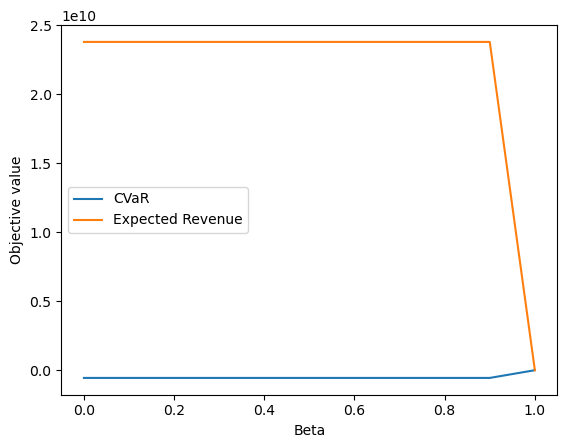

In [53]:
# Plot Results_CVaR and Results_Expected_rev in an elbow plot, with the values of Beta in the plot
import matplotlib.pyplot as plt
plt.plot(Beta, Results_CVaR, label = 'CVaR')
plt.plot(Beta, Results_Expected_rev, label = 'Expected Revenue')
plt.xlabel('Beta')
plt.ylabel('Objective value')
plt.legend()
plt.show()


In [23]:
Investment_CVaR.res.df

,Technology,Invested capacity (MW)
0,Coal,0.000000
1,Coal,0.000000
2,Coal,0.000000
3,Gas,0.000000
4,Coal,0.000000
5,Wind,400.000000
6,Wind,400.000000
7,PV,0.000000
8,Gas,0.000000
9,Coal,0.000000


In [24]:
# Export the results into the excel file called Investment Results and Market Clearing Results which are located in the folder Results
#InvestmentPB1.res.df.to_excel("../Results/InvestmentResults.xlsx")
#MarketClearing1.res.df.to_excel("../Results/MarketClearingResults.xlsx")

# Model 2: Integrated Bi-level optimization of dispatch problem and investment problem using KKTs

In [25]:
# ## CREATE THE PARAMETERS AND DATA OBJECTS
# ParametersObj_SHORT = Parameters(H, D, Y, 10, N_dem, N_gen_E, N_gen_N, N_zone, N_line, B, R)
# DataObj_SHORT = InputData(Dem[0:10,:], Uti, Load_Z, Gen_E_OpCost, Gen_N_OpCost, Gen_N_MaxInvCap, Gen_E_Cap, Gen_N_InvCost, Gen_E_Tech, Gen_N_Tech, Gen_E_Z, Gen_N_Z, Gen_E_OpCap[0:10,:], Gen_N_OpCap[0:10,:], Trans_React, Trans_Cap, Trans_Line_From_Z, Trans_Line_To_Z, Trans_Z_Connected_To_Z)

In [26]:
# class Model_2_no_zone():
#     def __init__(self, ParametersObj, DataObj, Model_results = 1, Guroby_results = 1):
#         self.P = ParametersObj # Parameters
#         self.D = DataObj # Data
#         self.Model_results = Model_results
#         self.Guroby_results = Guroby_results
#         self.var = Expando()  # Variables
#         self.con = Expando()  # Constraints
#         self.res = Expando()  # Results
#         self._build_model() 


#     def _build_variables(self):
#         self.var.P_N = self.m.addMVar((self.P.N_gen_N, 1), lb=0) # Invested capacity in every new generator
#         self.var.d = self.m.addMVar((self.P.N, self.P.N_dem), lb=0)  # demand per hour for every load
#         self.var.p_E = self.m.addMVar((self.P.N, self.P.N_gen_E), lb=0)  # power output per hour for every existing generator
#         self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N), lb=0) # Power output per hour for every new generator
        
#         # Dual variables
#         self.var.DA_Price = self.m.addMVar((self.P.N, 1), lb=-GRB.INFINITY)  # Day ahead price per hour
#         self.var.mu_E_up = self.m.addMVar((self.P.N, self.P.N_gen_E), lb=0)  # Dual 1
#         self.var.mu_E_down = self.m.addMVar((self.P.N, self.P.N_gen_E), lb=0)  # Dual 1
#         self.var.mu_N_up = self.m.addMVar((self.P.N, self.P.N_gen_N), lb=0)  # Dual 2
#         self.var.mu_N_down = self.m.addMVar((self.P.N, self.P.N_gen_N), lb=0)  # Dual 2
#         self.var.nu_up = self.m.addMVar((self.P.N, self.P.N_dem), lb=0)  # Dual 3
#         self.var.nu_down = self.m.addMVar((self.P.N, self.P.N_dem), lb=0)  # Dual 3
        
        

#     def _build_constraints(self):
#         # Capacity investment constraint
#         self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

#         # Budget constraint
#         self.con.budget = self.m.addConstr(self.var.P_N.T @ self.D.Gen_N_InvCost <= self.P.B, name='Budget constraint')

#         ## PRIMAL CONSTRAINTS
#         # Max production constraint existing
#         self.con.max_p_E = self.m.addConstr(self.var.p_E <= self.D.Gen_E_OpCap * (self.P.Sum_over_hours @ self.D.Gen_E_Cap.T), name='Maximum production of existing generators')

#         # Max production constraint new, in a different shape because we can't transpose varaibles
#         self.con.max_p_N = self.m.addConstrs(self.var.p_N[h, g] <= (self.D.Gen_N_OpCap[h, g] *  self.var.P_N[g].T) for h in range(self.P.N) for g in range(self.P.N_gen_N))

#         # Max demand constraint
#         self.con.max_dem = self.m.addConstr(self.var.d <= self.D.Dem, name='Maximum demand')        

#         # Balance constraint
#         prod_E = self.var.p_E @ self.P.Sum_over_gen_E  
#         prod_N = self.var.p_N @ self.P.Sum_over_gen_N  
#         dem = self.var.d @ self.P.Sum_over_dem
#         self.con.balance = self.m.addConstr(dem == prod_E + prod_N, name='Power balance') 

#         ## FIRST ORDER CONDITIONS

#         self.con.L_p_EC = self.m.addConstr(self.P.Sum_over_hours @ self.D.Gen_E_OpCost.T - self.var.DA_Price @ self.P.Sum_over_gen_E.T - self.var.mu_E_up + self.var.mu_E_down == 0, name='L_p_EC')
#         self.con.L_p_NC = self.m.addConstr(self.P.Sum_over_hours @ self.D.Gen_N_OpCost.T - self.var.DA_Price @ self.P.Sum_over_gen_N.T - self.var.mu_E_up + self.var.mu_E_down == 0, name='L_p_NC')
#         self.con.L_d = self.m.addConstr(- self.P.Sum_over_hours @ self.D.Uti.T + self.var.DA_Price @ self.P.Sum_over_dem.T - self.var.nu_up + self.var.nu_down == 0, name='L_d')
        

#         ## COMPLMEENTARY CONDITIONS

#         # Define the Big M matrixes

#         Big_M_p = np.full((self.P.N, self.P.N_gen_E), 1e3)  # Big M for the production constraints
#         Big_M_d = np.full((self.P.N, self.P.N_dem), 1e3)  # Big M for the demand constraints

#         # Define the binary variables

#         b_E_down = self.m.addVars(self.P.N, self.P.N_gen_E, vtype=gp.GRB.BINARY, name="b_E_down")
#         b_E_up = self.m.addVars(self.P.N, self.P.N_gen_E, vtype=gp.GRB.BINARY, name="b_E_up")

#         b_N_down = self.m.addVars(self.P.N, self.P.N_gen_N, vtype=gp.GRB.BINARY, name="b_N_down")
#         b_N_up = self.m.addVars(self.P.N, self.P.N_gen_N, vtype=gp.GRB.BINARY, name="b_N_up")

#         b_d_down = self.m.addVars(self.P.N, self.P.N_dem, vtype=gp.GRB.BINARY, name="b_d_down")
#         b_d_up = self.m.addVars(self.P.N, self.P.N_dem, vtype=gp.GRB.BINARY, name="b_d_up")

#         # Define the complementary constraints
#         # Existing generators
#         self.con.compl_E_down_mu = self.m.addConstrs((self.var.mu_E_down[h, g] <= Big_M_p[h, g] * b_E_down[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_down_mu')
#         self.con.compl_E_down_p = self.m.addConstrs((self.var.p_E[h, g] <= Big_M_p[h, g] * (1 - b_E_down[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_down_p')
#         self.con.compl_E_up_mu = self.m.addConstrs((self.var.mu_E_up[h, g] <= Big_M_p[h, g] * b_E_up[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_up_mu')
#         self.con.compl_E_up_p = self.m.addConstrs(((self.D.Gen_E_OpCap[h, g] - self.var.p_E[h, g]) <= Big_M_p[h, g] * (1 - b_E_up[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_up_p')

#         # New generators
#         self.con.compl_N_down_mu = self.m.addConstrs((self.var.mu_N_down[h, g] <= Big_M_p[h, g] * b_N_down[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_down_mu')
#         self.con.compl_N_down_p = self.m.addConstrs((self.var.p_N[h, g] <= Big_M_p[h, g] * (1 - b_N_down[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_down_p')
#         self.con.compl_N_up_mu = self.m.addConstrs((self.var.mu_N_up[h, g] <= Big_M_p[h, g] * b_N_up[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_up_mu')
#         self.con.compl_N_up_p = self.m.addConstrs(((self.D.Gen_N_OpCap[h, g] - self.var.p_N[h, g]) <= Big_M_p[h, g] * (1 - b_N_up[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_up_p')

#         # Demand
#         self.con.compl_d_down_mu = self.m.addConstrs((self.var.nu_down[h, d] <= Big_M_d[h, d] * b_d_down[h, d] for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_down_mu')
#         self.con.compl_d_down_p = self.m.addConstrs((self.var.d[h, d] <= Big_M_d[h, d] * (1 - b_d_down[h, d]) for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_down_p')
#         self.con.compl_d_up_mu = self.m.addConstrs((self.var.nu_up[h, d] <= Big_M_d[h, d] * b_d_up[h, d] for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_up_mu')
#         self.con.compl_d_up_p = self.m.addConstrs(((self.D.Dem[h, d] - self.var.d[h, d]) <= Big_M_d[h, d] * (1 - b_d_up[h, d]) for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_up_p')




#     def _build_objective(self):

#         # 1. Costs related to existing generators (G_EC)
#         cost_EC_p = (self.var.p_E @ self.D.Gen_E_OpCost).sum()
#         cost_EC_mu = ((self.D.Gen_E_OpCap * (self.P.Sum_over_hours @ self.D.Gen_E_Cap.T)) * self.var.mu_E_up).sum()

#         # 2. Benefits and costs related to demand (D)
#         benefit_d = (self.var.d @ self.D.Uti).sum()
#         cost_nu_d = (self.D.Dem * self.var.nu_up).sum()

#         # 3. Costs related to new generators (G_NC)
#         cost_NC_p = (self.var.p_N @ self.D.Gen_N_OpCost).sum()
#         cost_NC_P = (self.var.P_N.T @ self.D.Gen_N_InvCost).sum()

#         # Full objective function
#         self.m.setObjective(
#             - cost_EC_p - cost_EC_mu  # Existing generators
#             + benefit_d - cost_nu_d   # Demand
#             - cost_NC_p - cost_NC_P,  # New generators
#             gp.GRB.MAXIMIZE
#         )

        


#     def _display_guropby_results(self):
#         self.m.setParam('OutputFlag', self.Guroby_results)
#         #self.m.setParam('Method', 2)  # Use barrier method
#         #self.m.setParam('Crossover', 0)  # Skip crossover for speed
#         #self.m.setParam('Heuristics', 0.2)  # Enable aggressive heuristics
#         #self.m.setParam('MIPFocus', 1)  # Focus on finding feasible solutions
    

#     def _build_model(self):
#         self.m = gp.Model('Model 2')
#         self._build_variables()  
#         self._build_constraints()
#         self._build_objective()
#         self._display_guropby_results()
#         self.m.optimize()
#         if self.Model_results == 1:
#             self._extract_results()

#     def _extract_results(self):
#         # Display the objective value
#         print('Objective value: ', self.m.objVal)
        
#         # Display the generators the model invested in, in a dataframe
#         self.res.P_N = self.var.P_N.X
#         self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
#         self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
#         self.res.df['Invested capacity (MW)'] = self.res.P_N
            

        

In [27]:
# Model2NZ = Model_2_no_zone(ParametersObj_SHORT, DataObj_SHORT)